In [122]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [123]:
pdr.get_data_alphavantage('TSLA', api_key='YOUR_API_KEY')

,open,high,low,close,volume
2010-06-29,19.000,25.0000,17.540,23.89,18766300
2010-06-30,25.790,30.4192,23.300,23.83,17187100
2010-07-01,25.000,25.9200,20.270,21.96,8218800
2010-07-02,23.000,23.1000,18.710,19.20,5139800
2010-07-06,20.000,20.0000,15.830,16.11,6866900
...,...,...,...,...,...
2025-03-13,248.125,248.2900,232.600,240.68,114813525
2025-03-14,247.310,251.5800,240.730,249.98,100242264
2025-03-17,245.055,245.4000,232.800,238.01,111900565
2025-03-18,228.155,230.1000,222.280,225.31,111477636


In [124]:
import yfinance as yf

# Download TSLA data
df_tesla = yf.download('TSLA', start='2020-01-01', end='2025-03-17')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

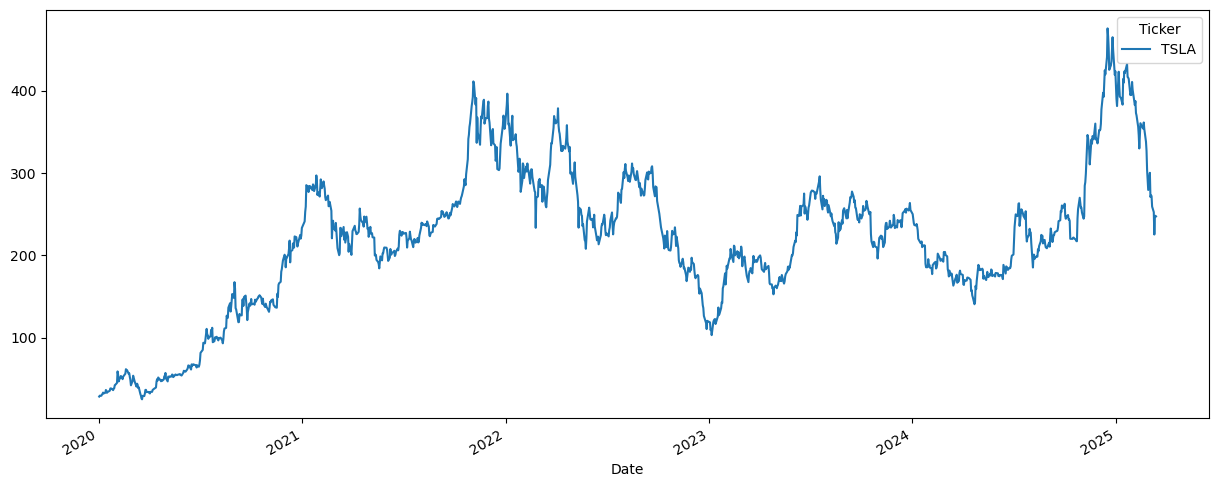

In [125]:
df_tesla['Open'].plot(figsize=(15,6))

In [131]:
df_tesla['Open:10 days rolling']= df_tesla['Open'].rolling(window=10, min_periods=1).mean()
#moving average

In [133]:
df_tesla['Open:50 days rolling']= df_tesla['Open'].rolling(window=50, min_periods=1).mean()
#moving average

In [135]:
df_tesla['Open:25 days rolling']= df_tesla['Open'].rolling(window=25, min_periods=1).mean()
#moving average

<Axes: xlabel='Date'>

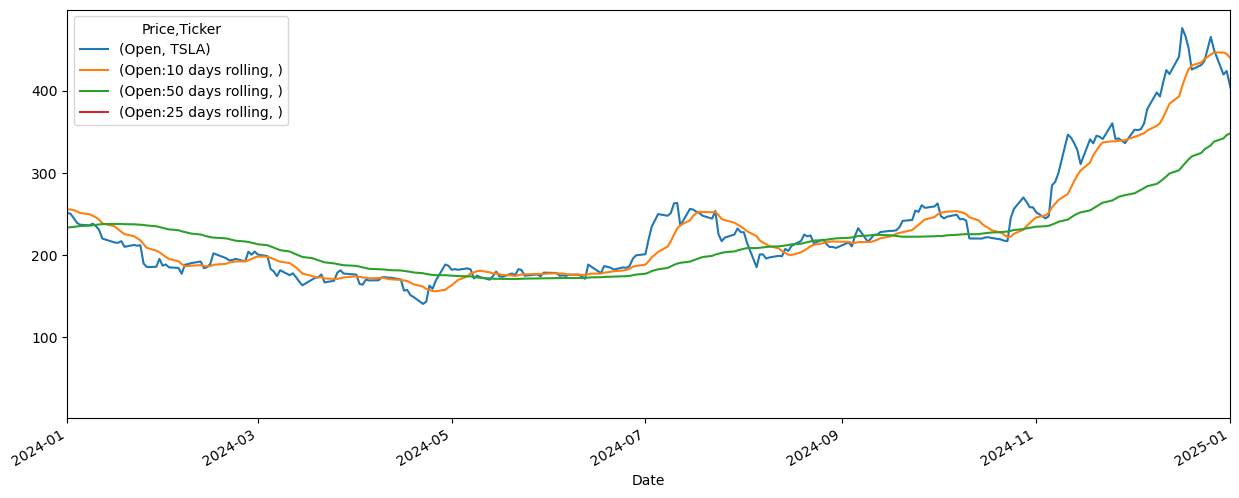

In [137]:
df_tesla[['Open','Open:10 days rolling','Open:50 days rolling','Open:25 days rolling']].plot(xlim=['2024-01-01','2025-01-01'],figsize=(15,6))



<Axes: xlabel='Date'>

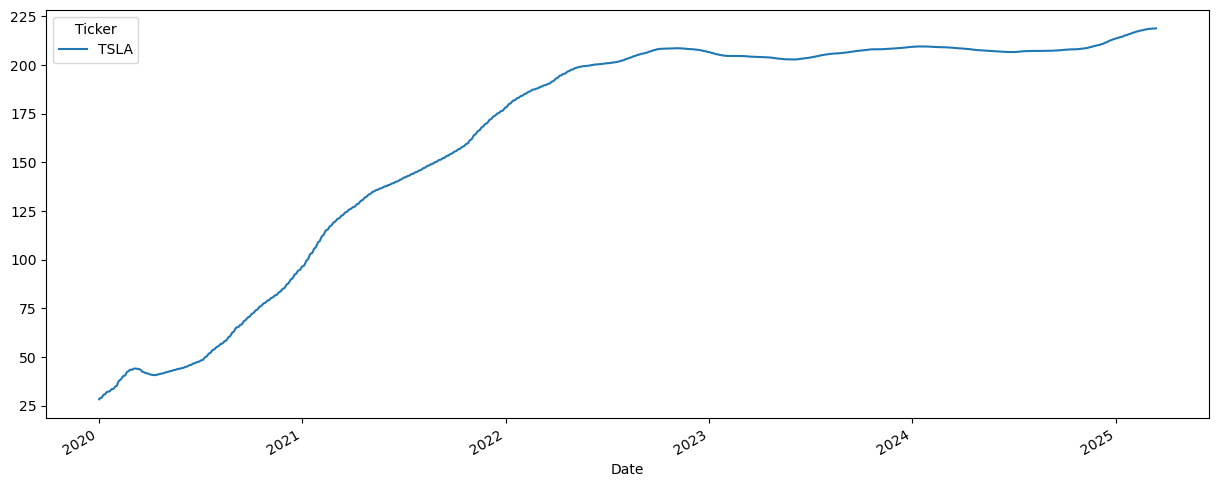

In [139]:
#cumulative moving average
df_tesla['Open'].expanding().mean().plot(figsize=(15,6))

In [141]:
#exponential  moving average

In [143]:
df_tesla['EMA_0.1']= df_tesla['Open'].ewm(alpha=0.1, adjust= False).mean()

<Axes: xlabel='Date'>

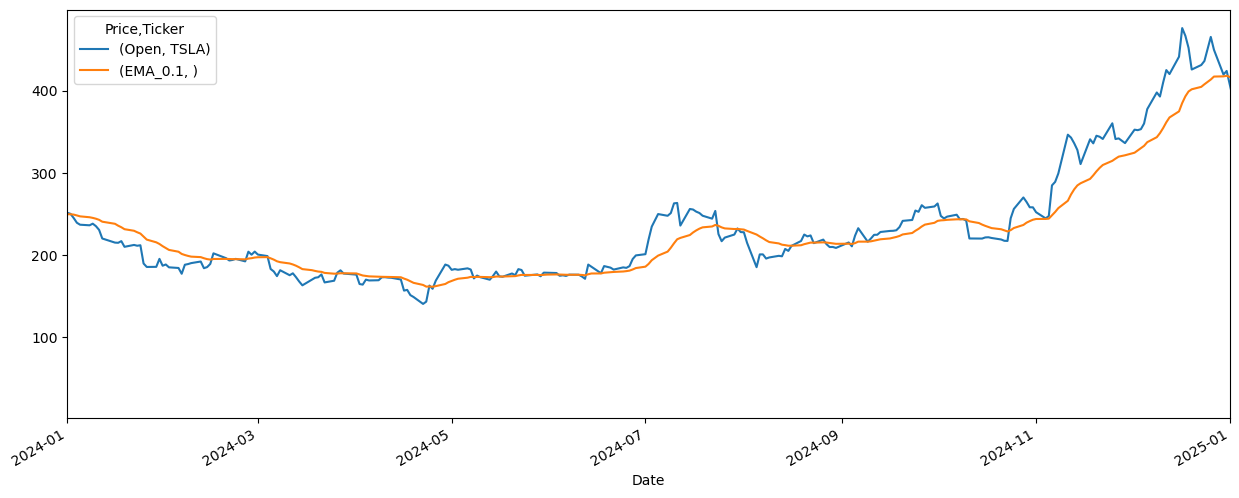

In [145]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2024-01-01','2025-01-01'],figsize=(15,6))



In [147]:
df_tesla['EMA_0.3']= df_tesla['Open'].ewm(alpha=0.3, adjust= False).mean()

<Axes: xlabel='Date'>

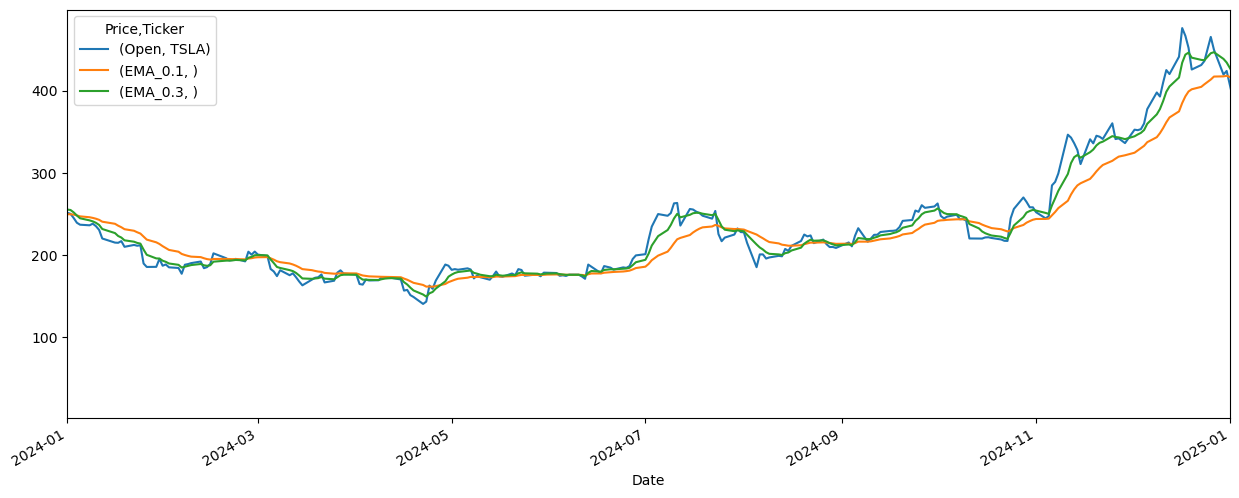

In [149]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2024-01-01','2025-01-01'],figsize=(15,6))



In [151]:
#EWMA
df_tesla['EMA_5days']= df_tesla['Open'].ewm(span=5,).mean()

<Axes: xlabel='Date'>

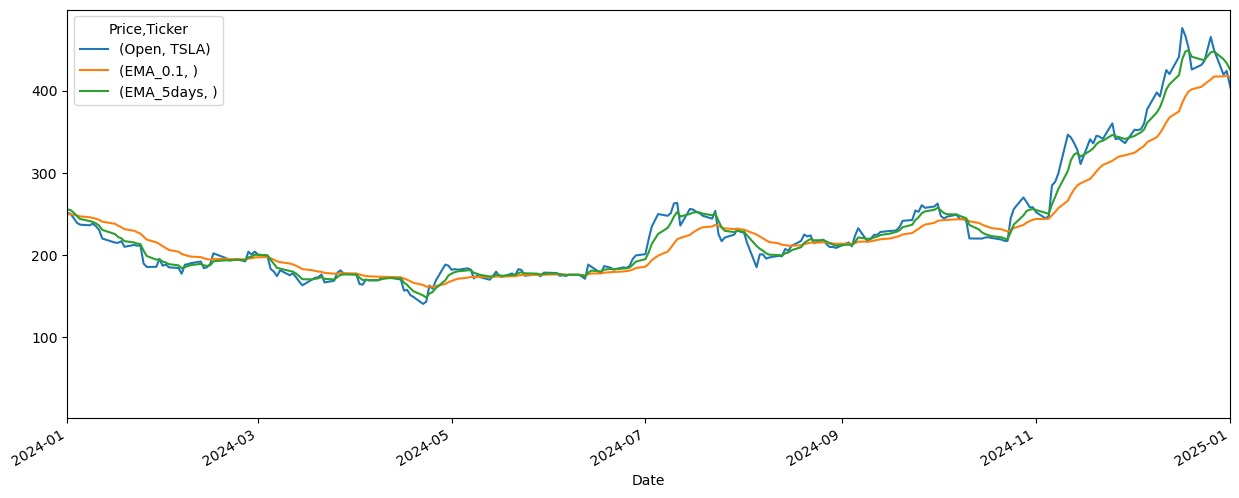

In [161]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2024-01-01','2025-01-01'],figsize=(15,6))